# Introduction to Image Processing


--- Alessandro Motta, 2nd of November 2023

In [1]:
import imageio
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp

## Loading an Image

We use the [imageio](http://imageio.readthedocs.io) library to read a PNG file that contains a photo of two parrots. To display the image, we use [Matplotlib](https://matplotlib.org/).

<ipython-input-2-17842e11e29e>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img = imageio.imread(img_file)


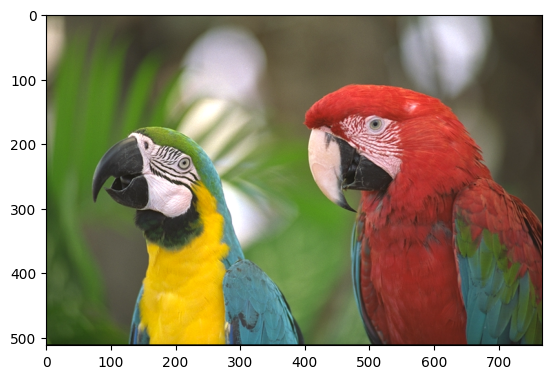

In [2]:
img_file = 'https://r0k.us/graphics/kodak/kodak/kodim23.png'
img = imageio.imread(img_file)

plt.imshow(img)
plt.show()

## Computer Representation of Images

In [3]:
print(f"The image has type: {type(img)}")
print(f"The n-dimensional array (ndarray) with shape: {img.shape}")
print(f"The elements of the ndarray have type: {img.dtype}")

The image has type: <class 'numpy.ndarray'>
The n-dimensional array (ndarray) with shape: (512, 768, 3)
The elements of the ndarray have type: uint8


## Plotting the Channels separately

- Can you guess what the different channels represent?

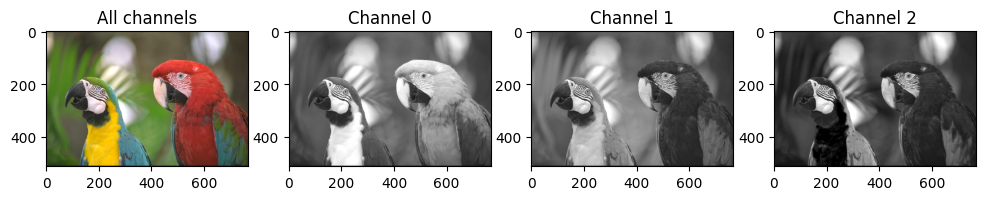

In [4]:
plt.figure(figsize=(12, 3))

ax = plt.subplot(1, 4, 1)
ax.set_title("All channels")
ax.imshow(img)

img_channels = np.split(img, img.shape[2], axis=2)
for i, img_channel in enumerate(img_channels):
  ax = plt.subplot(1, 4, 2 + i)
  ax.set_title(f"Channel {i}")
  ax.imshow(img_channel, cmap='gray')

plt.show()

## Converting Image to Grayscale

For context, see: https://pillow.readthedocs.io/en/stable/reference/Image.html#PIL.Image.Image.convert

The grayscale image has shape: (512, 768)


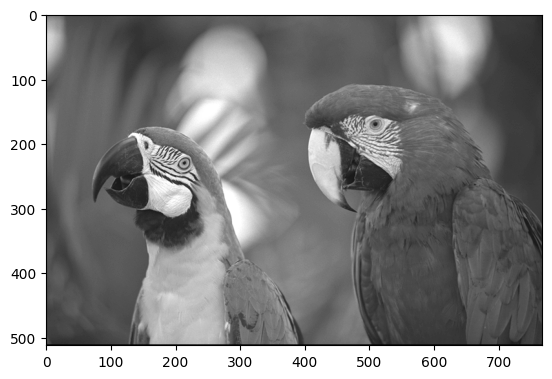

In [5]:
def to_grayscale(img):
  # Convert channels from integers 0, .., 255 to floating point numbers -1, .., 1
  img_gray = 2 * (img.astype(float) / 255) - 1
  # Separate channels
  img_gray = np.split(img_gray, img_gray.shape[2], axis=2)

  # Convert to grayscale
  img_gray = (
      img_gray[0] * 0.299 +
      img_gray[1] * 0.587 +
      img_gray[2] * 0.114
  )

  # Remove the channel dimension
  img_gray = img_gray[:, :, 0]
  return img_gray

img_gray = to_grayscale(img)
print(f"The grayscale image has shape: {img_gray.shape}")
plt.imshow(img_gray, cmap='gray', vmin=-1, vmax=+1)
plt.show()

## Modifying the Image by adding / multiplying by a Value

- What happens when you add / subtract from the image values?
- What happens when you multiply / decide the image values?

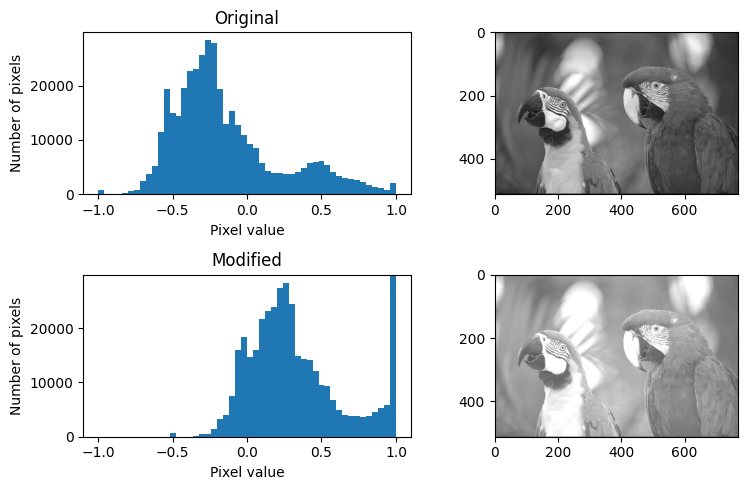

In [6]:
def plot_original_and_modified_image(img, img_modified):
  plt.figure(figsize=(8, 5))

  # Original image
  ax = plt.subplot(2, 2, 1)
  ax.set_title("Original")
  ax.set_xlabel("Pixel value")
  ax.set_ylabel("Number of pixels")
  ax.hist(img.reshape(-1), bins=np.linspace(-1, 1, 51), range=(-1, +1))
  hist_ylim = ax.get_ylim()

  ax = plt.subplot(2, 2, 2)
  ax.imshow(img, cmap='gray', vmin=-1, vmax=+1)

  # Modified image
  ax = plt.subplot(2, 2, 3)
  ax.set_title("Modified")
  ax.set_xlabel("Pixel value")
  ax.set_ylabel("Number of pixels")
  ax.hist(img_modified.reshape(-1), bins=np.linspace(-1, 1, 51))
  ax.set_ylim(*hist_ylim)

  ax = plt.subplot(2, 2, 4)
  ax.imshow(img_modified, cmap='gray', vmin=-1, vmax=+1)

  plt.tight_layout()
  plt.show()

# Modify the image
img_modified = img_gray + 0.5
# Make sure that the values stay within -1, .., +1
img_modified = np.clip(img_modified, -1, +1)

plot_original_and_modified_image(img_gray, img_modified)

## Adding an removing Noise
- What happens if you increase the bandwidth?

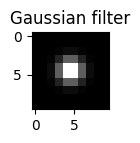

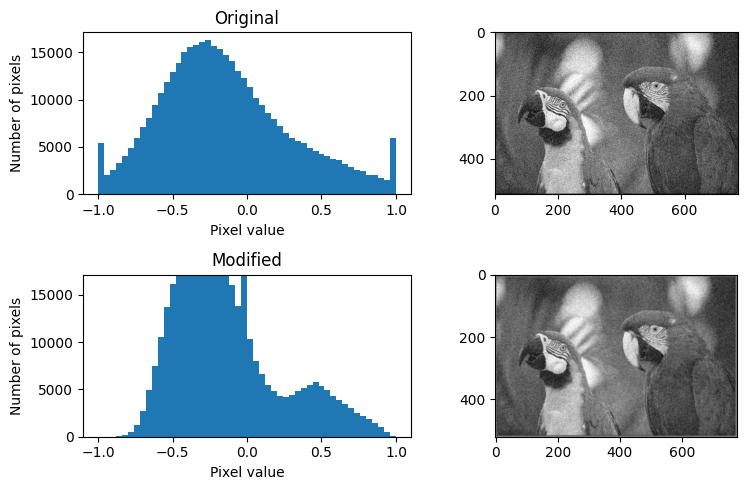

In [7]:
def make_gaussian_filter(*, bandwidth, size):
  filter = np.linspace(-(size - 1) / 2, +(size - 1) / 2, size)
  filter = np.exp(-(
      np.square(filter.reshape(size, 1) / bandwidth) +
      np.square(filter.reshape(1, size) / bandwidth)
  ) / 2) / (2 * np.pi * np.square(bandwidth))
  return filter.reshape(size, size)

# Adding noise to image
img_noisy = img_gray + 0.25 * np.random.normal(size=img_gray.shape)
img_noisy = np.clip(img_noisy, -1, +1)

# Creating Gaussian filter
gauss_filter = make_gaussian_filter(bandwidth=1, size=10)

plt.figure(figsize=(1, 1))
plt.title("Gaussian filter")
plt.imshow(gauss_filter, cmap='gray', vmin=0)
plt.show()

img_filtered = sp.signal.convolve2d(img_noisy, gauss_filter)
plot_original_and_modified_image(img_noisy, img_filtered)

## Sobel filter
- What does this filter do?
- Can you explain how it works? (Hint: look at the two filters separately)
- Could you get the same result with a single filter?

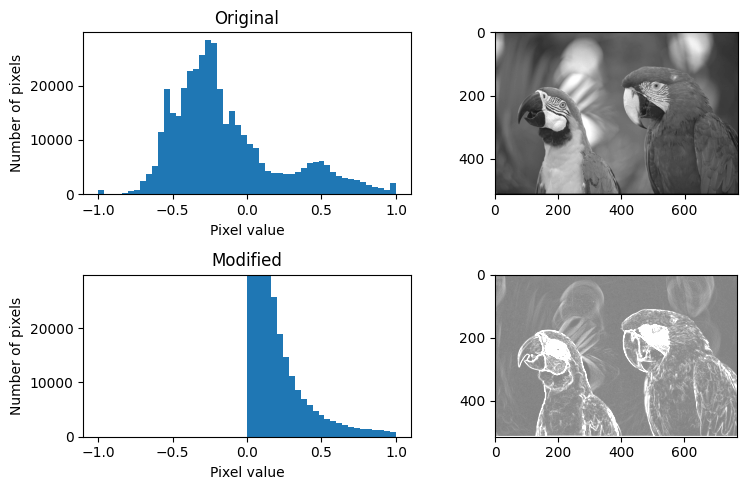

In [8]:
sobel_filter_x = np.asarray(
    [[1, 0, -1],
     [2, 0, -2],
     [1, 0, -1]],
    dtype=float
)

sobel_filter_y = np.asarray(
    [[ 1,  2,  1],
     [ 0,  0,  0],
     [-1, -2, -1]],
    dtype=float
)

img_filtered = np.sqrt(
    np.square(sp.signal.convolve2d(img_gray, sobel_filter_x)) +
    np.square(sp.signal.convolve2d(img_gray, sobel_filter_y))
)

plot_original_and_modified_image(img_gray, img_filtered)

## Lossy Image Formats
- If you write an image as JPEG and read it back in, do you get back the original?
- If there are differences, where are they? Can you speculate or explain why?
- What if you write / read the image as PNG?

<ipython-input-9-abec5591ca46>:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_jpeg = imageio.imread('image.jpeg')


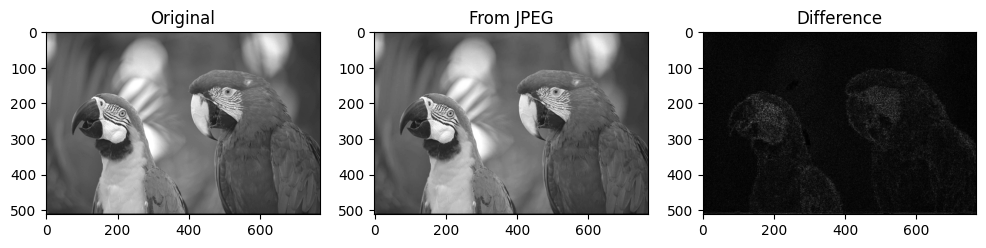

In [9]:
imageio.imwrite('image.jpeg', img)
img_jpeg = imageio.imread('image.jpeg')
img_jpeg_gray = to_grayscale(img_jpeg)

plt.figure(figsize=(12, 3))
plt.subplot(1, 3, 1)
plt.title('Original')
plt.imshow(img_gray, cmap='gray', vmin=-1, vmax=+1)

plt.subplot(1, 3, 2)
plt.title('From JPEG')
plt.imshow(img_jpeg_gray, cmap='gray', vmin=-1, vmax=+1)

plt.subplot(1, 3, 3)
plt.title('Difference')
plt.imshow(np.abs(img_gray - img_jpeg_gray), cmap='gray', vmin=0)

plt.show()